## import openCv

In [ ]:
import cv2

# store list

In [ ]:
image = []
lables = []


## Normal Person ECG with PreProcessing of the Image ##

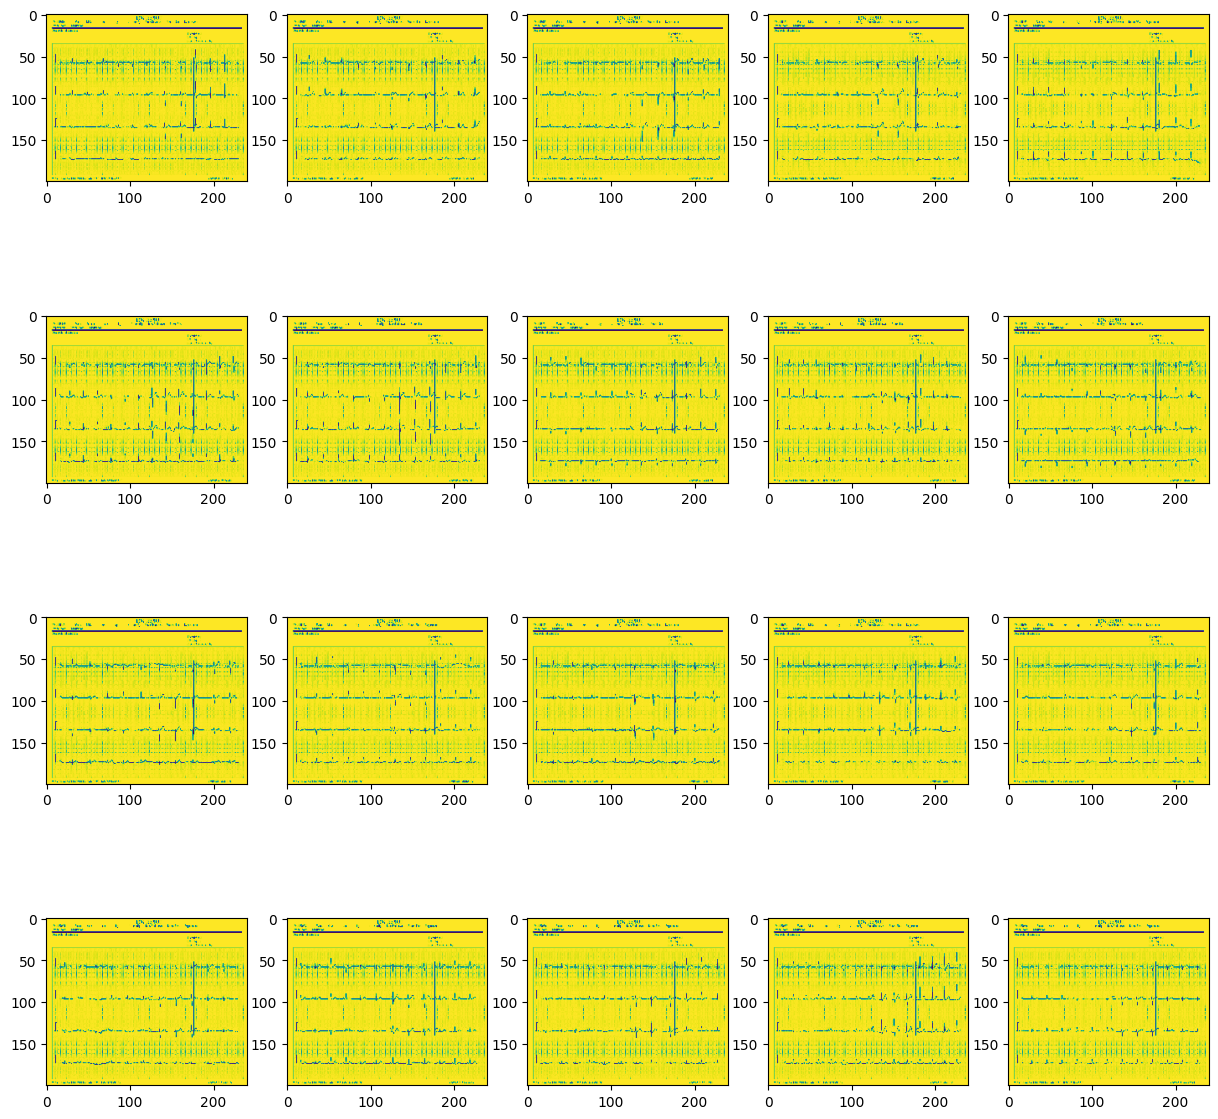

In [ ]:
for i in range(1, 285):
    # /content/drive/MyDrive/Dataset/Normal Person ECG Images (284x12=3408)
    img = cv2.imread(f"/content/drive/MyDrive/Dataset/Normal Person ECG Images (284x12=3408)/Normal({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 200))
    image.append(gray)
    lables.append(0)  # Normal
# Sample Images

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[10 + i*3])
plt.show()

## Myocardial Infected Person ECG with PreProcessing of the Image ##


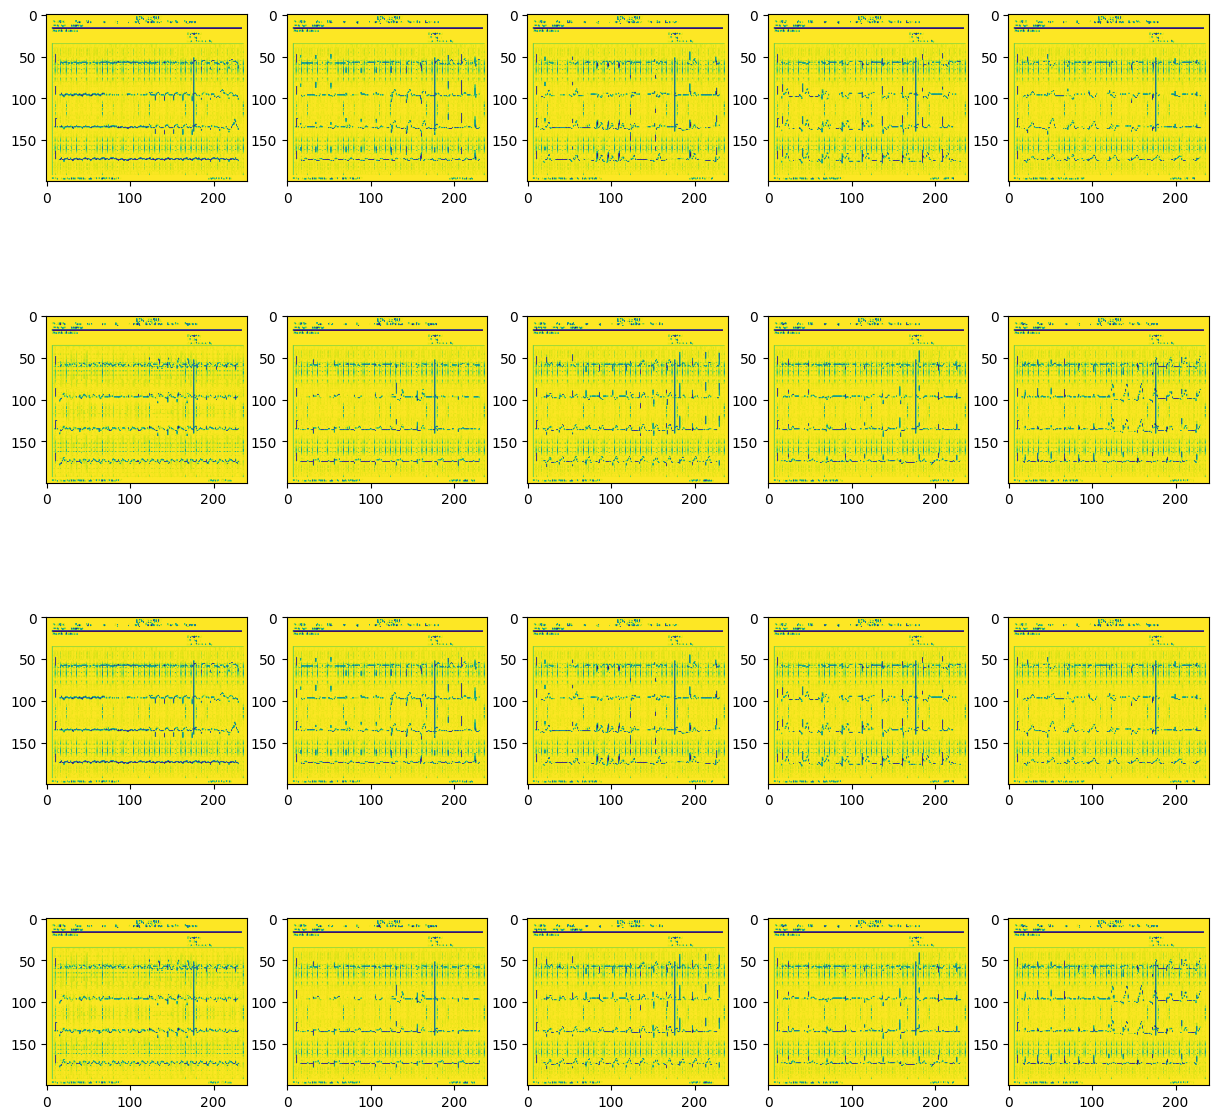

In [ ]:
for i in range(1, 240):
    # /content/drive/MyDrive/Dataset/ECG Images of Myocardial Infarction Patients (240x12=2880)
    img = cv2.imread(f"/content/drive/MyDrive/Dataset/ECG Images of Myocardial Infarction Patients (240x12=2880)/MI({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 200))
    image.append(gray)
    lables.append(1)  # Myocardial
# Sample Images
plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[300 + i*3])
plt.show()

## MI Infected Person ECG with PreProcessing of the Image ##


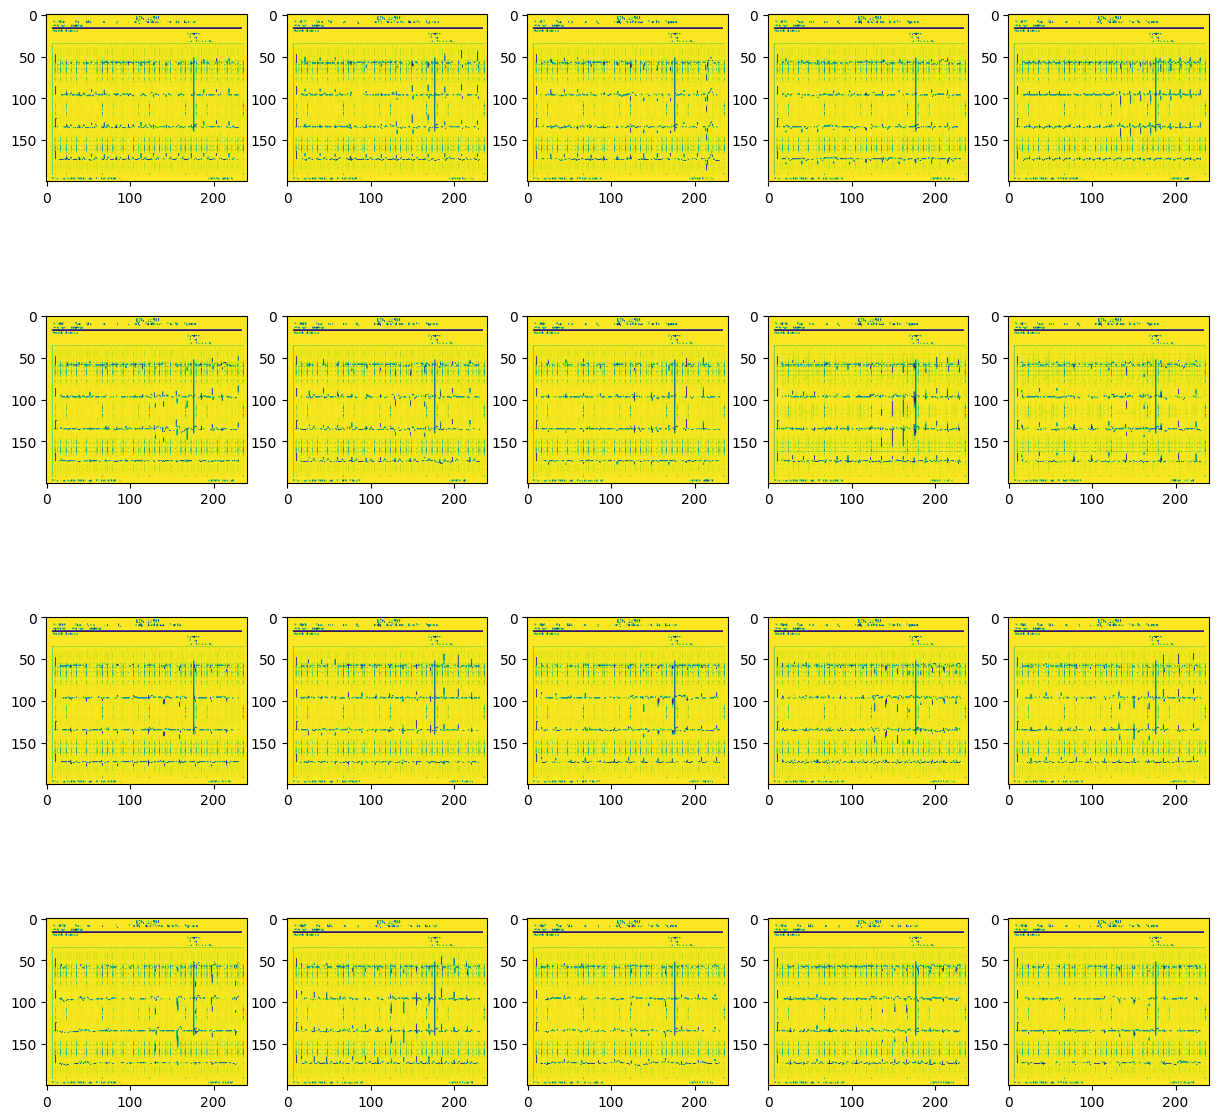

In [ ]:
for i in range(1, 173):
    # /content/drive/MyDrive/Dataset/ECG Images of Patient that have History of MI (172x12=2064)
    img = cv2.imread(f"/content/drive/MyDrive/Dataset/ECG Images of Patient that have History of MI (172x12=2064)/PMI({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 200))
    image.append(gray)
    lables.append(2)    # MI
# Sample Images
plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[600 + i*3])
plt.show()

## Abnormal Heartbeat Infected Person ECG with PreProcessing of the Image ##


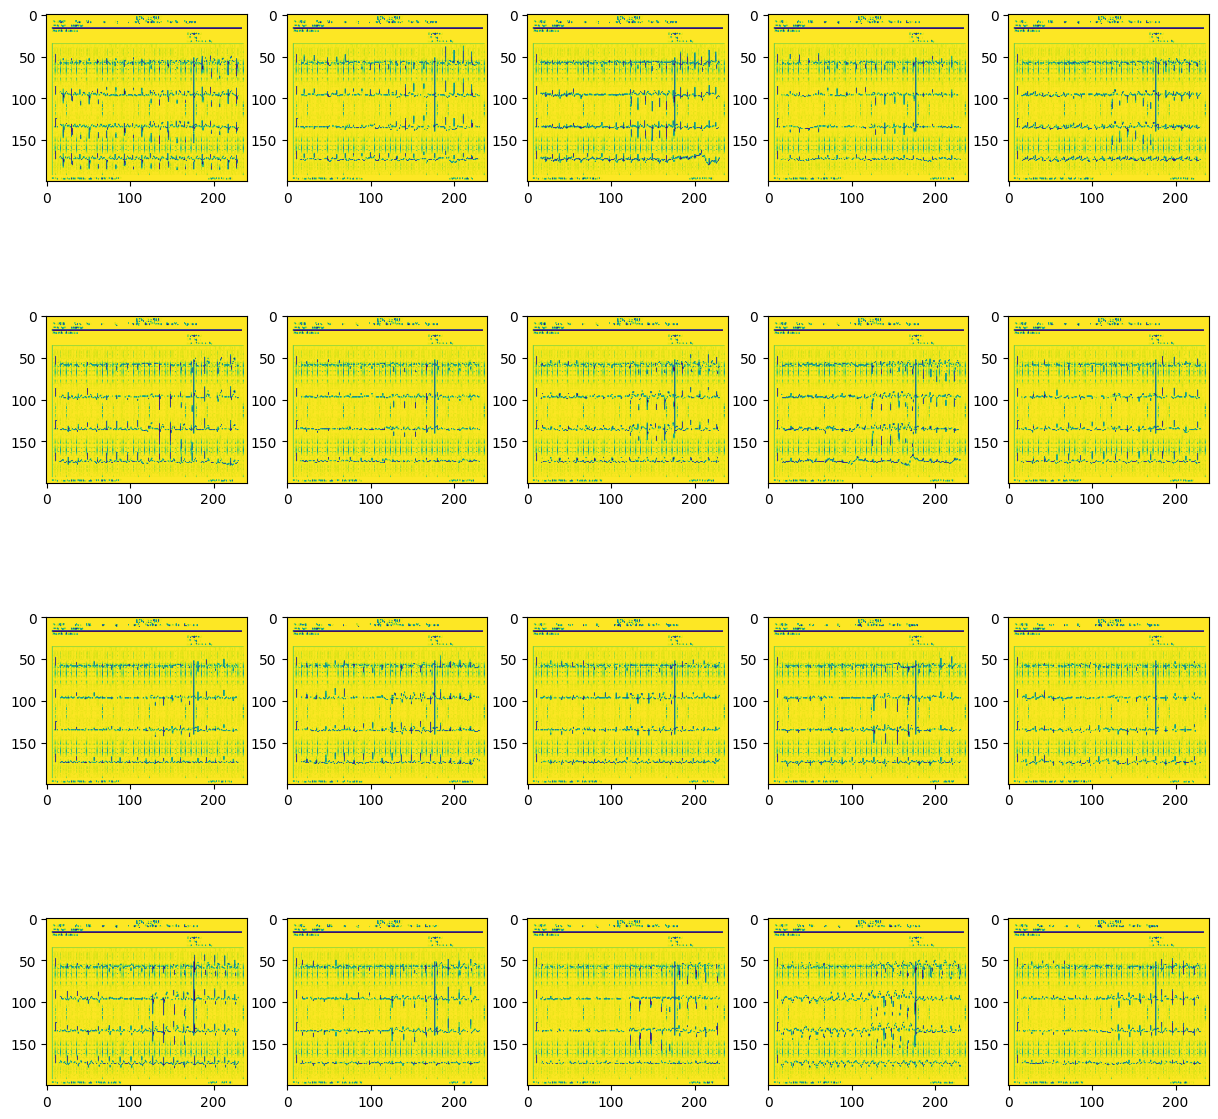

In [ ]:
for i in range(1, 234):
    # /content/drive/MyDrive/Dataset/ECG Images of Patient that have abnormal heartbeat (233x12=2796)
    img = cv2.imread(f"/content/drive/MyDrive/Dataset/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 200))
    image.append(gray)
    lables.append(3)   # Abnormal Heartbeat
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[800 + i*3])
plt.show()

In [ ]:
len(image)

928

# Shape of the Images


In [ ]:
print(f"Shape of each image is = {image[1].shape}")

Shape of each image is = (200, 240)


# Convert The List into Array Format  #


In [ ]:
import numpy as np

train_feature = np.array(image)
lables = np.array(lables)

## Display Array Shape ##


In [ ]:
print(f"image dataset shape = {train_feature.shape}")

print(f"lable dataset shape = {lables.shape}")

image dataset shape = (928, 200, 240)
lable dataset shape = (928,)


## Split The Dataset into Test and Train 


In [ ]:
from sklearn.model_selection import train_test_split

# train_features, test_features, train_target, test_target = train_test_split(train_feature,lables,test_size=0.1)
# X_train = train_features
# X_test = test_features
# y_train = train_target
# y_test = test_target

X_train, X_test, y_train, y_test = train_test_split(train_feature,lables,test_size=0.1)

print(f"train_features shape(images) = {X_train.shape}")

print(f"test_features shape(images) = {X_test.shape}")

print(f"train_target shape(labels) = {y_train.shape}")

print(f"test_target shape(labels) = {y_test.shape}")

train_features shape = (835, 200, 240)
test_features shape = (93, 200, 240)
train_target shape = (835,)
test_target shape = (93,)


# Deep Learning CNN Model
## MODEL ARCHITECTURE


In [ ]:
import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# ONE HOT ENCODING


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# MODEL LAYERS


In [ ]:
model=Sequential()

# Convolutional Layers


In [ ]:
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (200, 240, 1)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 240, 50)      500       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 240, 75)      33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 120, 75)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 900000)            0         
                                                                 
 dense (Dense)               (None, 500)               450000500 
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                        

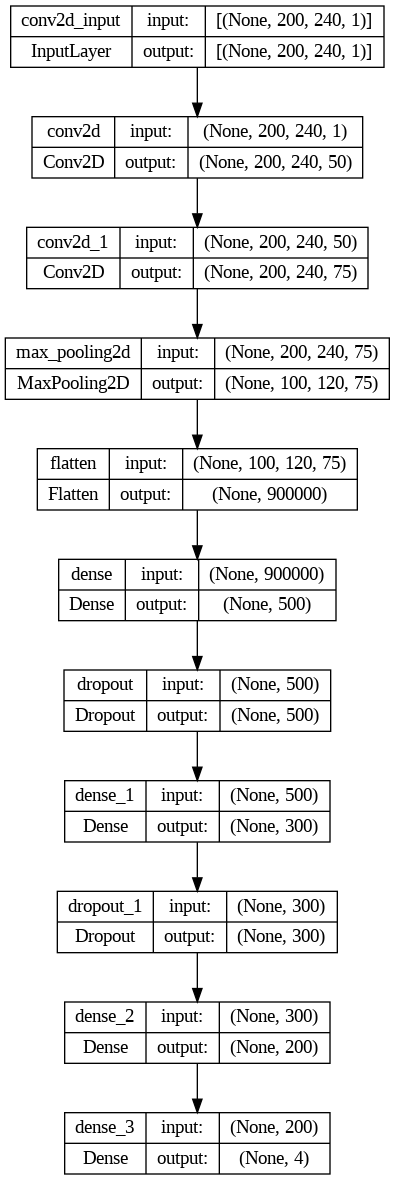

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# MODEL COMPILE


In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# MODEL FITTING


## Checkpoint while fitting

In [ ]:
filepath = "/content/Untitled Folder/weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(
    filepath,
    monitor ='loss',
    verbose = 0,
    save_best_only = True,
    mode = 'min'
)

callbacks_list = [checkpoint]

## Model training

In [ ]:
#model.load_weights("/content/Untitled Folder/weights-improvement-11-0.0024-bigger.hdf5")

In [ ]:
cnn=model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15, callbacks = callbacks_list)

Epoch 1/15
27/27 [==============================] - 54s 2s/step - loss: 4.4802 - accuracy: 0.2826 - val_loss: 1.4040 - val_accuracy: 0.3118
Epoch 2/15
27/27 [==============================] - 36s 1s/step - loss: 1.2401 - accuracy: 0.4683 - val_loss: 1.7485 - val_accuracy: 0.3763
Epoch 3/15
27/27 [==============================] - 37s 1s/step - loss: 0.7970 - accuracy: 0.7126 - val_loss: 0.6653 - val_accuracy: 0.7634
Epoch 4/15
27/27 [==============================] - 36s 1s/step - loss: 0.2576 - accuracy: 0.9162 - val_loss: 0.4945 - val_accuracy: 0.7849
Epoch 5/15
27/27 [==============================] - 36s 1s/step - loss: 0.0782 - accuracy: 0.9772 - val_loss: 0.7633 - val_accuracy: 0.7957
Epoch 6/15
27/27 [==============================] - 37s 1s/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.6884 - val_accuracy: 0.7957
Epoch 7/15
27/27 [==============================] - 37s 1s/step - loss: 0.0207 - accuracy: 0.9976 - val_loss: 0.6713 - val_accuracy: 0.8602
Epoch 8/15
27/27 [==

##plotting training and validation loss

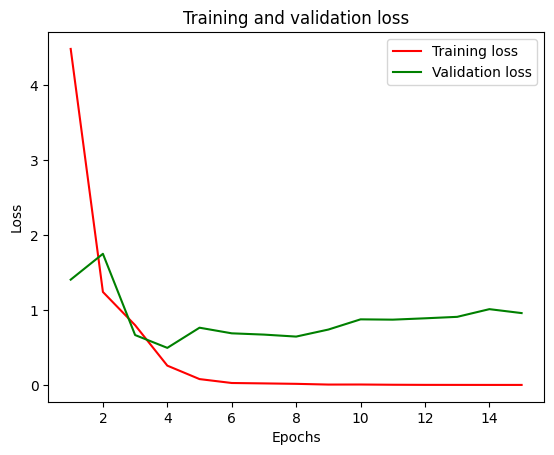

In [ ]:
import matplotlib.pyplot as plt
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##plotting training and validation accuracy

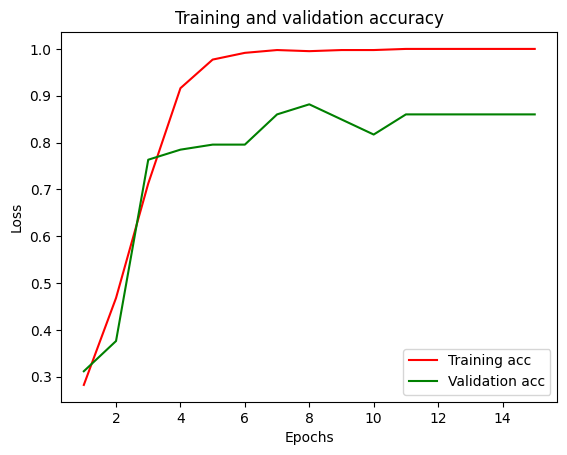

In [ ]:
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test our Model


In [ ]:
pred = model.predict(X_test)

3/3 [==============================] - 0s 86ms/step


# Accuracy of Our Model #


In [ ]:
wrong = 0

for i in range(93) :
    test = np.argmax(pred[i])
    train = np.argmax(y_test[i])
    if (test != train):
        wrong += 1

print(f"Model Accuracy : {((93 - wrong)/93)*100} %")

Model Accuracy : 86.02150537634408 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
yy_test=np.argmax(y_test, axis=1)
confusion_matrix = confusion_matrix(yy_test, y_pred)
confusion_report = classification_report(yy_test, y_pred)
print(confusion_matrix)

3/3 [==============================] - 0s 50ms/step
[[23  0  2  0]
 [ 0 17  0  0]
 [ 0  2 16  4]
 [ 2  0  3 24]]


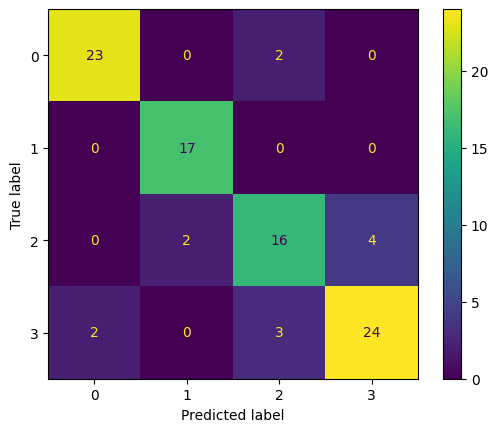

In [ ]:
import sklearn.metrics as metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
print(confusion_report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.89      1.00      0.94        17
           2       0.76      0.73      0.74        22
           3       0.86      0.83      0.84        29

    accuracy                           0.86        93
   macro avg       0.86      0.87      0.86        93
weighted avg       0.86      0.86      0.86        93



In [ ]:
img = cv2.imread('/content/drive/MyDrive/TestDataMLandAI/PMI(59).jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = gray / 255
gray = cv2.resize(gray, (240, 200))
gray = np.reshape(gray, (1, 200, 240, 1))

In [ ]:
pred = model.predict(gray)
class_idx = np.argmax(pred)
print(class_idx)

1/1 [==============================] - 0s 294ms/step
2


In [ ]:
class_name = {0:"Normal Heartbeat",1:"Myocardial infraction",2:"History of MI",3:"Abnormal Heartbeat",}

In [ ]:
class_name[class_idx]

'History of MI'